In [1]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

def remap(fc, roimap=ours2orig):
    fc = fc[roimap,:]
    fc = fc[:,roimap]
    return fc

print('Complete')

Complete


In [2]:
# Load FC

import pickle
import numpy as np

pncdir = '/home/anton/Documents/Tulane/Research/data-sav/anton/cohorts/PNC/'
lowrankdir = '/home/anton/Documents/Tulane/Research/Work/ContrastiveLearning/PNC/Top10/'
pncdemo = pickle.load(open(f'{pncdir}/demographics.pkl', 'rb'))
no_snps_subs = pickle.load(open('/home/anton/Documents/Tulane/Research/ImageNomer/data/PNC/fc_subs_no_snps.pkl', 'rb'))

rest = []
nback = []
emoid = []
restmat = []
nbackmat = []
emoidmat = []
race = []
sex = []
age = []
wrat = []
subids = []

a,b = np.triu_indices(264,1)

for sub in pncdemo['age_at_cnb']:
    if sub in no_snps_subs:
        continue
    try:
        ra = pncdemo['Race'][sub]
        ag = pncdemo['age_at_cnb'][sub]
        se = pncdemo['Sex'][sub]
        wr = pncdemo['WRAT_CR_STD'][sub]
        if ra not in ['AA', 'EA']:
            continue
        ra = ra == 'AA'
        se = se == 'M'
        r = np.load(f'{pncdir}/fc/{sub}_task-rest_fc.npy')
        n = np.load(f'{pncdir}/fc/{sub}_task-nback_fc.npy')
        e = np.load(f'{pncdir}/fc/{sub}_task-emoid_fc.npy')
        r = remap(vec2mat(r))
        n = remap(vec2mat(n))
        e = remap(vec2mat(e))
        race.append(ra)
        sex.append(se)
        age.append(ag)
        wrat.append(wr)
        rest.append(r[a,b])
        nback.append(n[a,b])
        emoid.append(e[a,b])
        subids.append(sub)
    except:
        pass

rest = np.stack(rest)
nback = np.stack(nback)
emoid = np.stack(emoid)
race = np.array(race).astype('int')
sex = np.array(sex).astype('int')
age = np.array(age)
wrat = np.array(wrat)

# age = (age-np.mean(age))/np.std(age)

print([a.shape for a in [rest, nback, emoid, race, sex, age, wrat]])

[(1154, 34716), (1154, 34716), (1154, 34716), (1154,), (1154,), (1154,), (1154,)]


In [8]:
from scipy.stats import ttest_ind

print(np.sum((race == 1)*(sex == 1)))
print(np.sum((race == 1)*(sex == 0)))
res = ttest_ind((race == 1)*(sex == 1),(race == 1)*(sex == 0))
print(res.pvalue)

print(np.mean(age[race == 1]), np.std(age[race == 1]))
print(np.mean(age[race == 0]), np.std(age[race == 0]))
res = ttest_ind(age[race == 1], age[race == 0])
print(res.pvalue)

224
311
1.7255059742367097e-05
14.596261682242991 3.2320800059972625
14.596122778675282 3.505599189579252
0.9994453915458162


In [5]:
# Load big SNPs

snps = []
no_snps_subs = []

snps_file = pickle.load(open('/home/anton/Documents/Tulane/Research/ImageNomer/data/PNC/snps_all_subs_big.pkl', 'rb'))

for sub in subids:
    if sub not in snps_file:
        print(sub)
        # no_snps_subs.append(sub)
    snps.append(snps_file[sub])

snps = np.stack(snps)
snps[np.isnan(snps)] = 0

print(snps.shape)

(1154, 35621)


In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import random

def rmse(a, b, mean=torch.mean):
    return mean((a-b)**2)**0.5

def pretty(x):
    return f'{round(float(x), 4)}'

class SNPVAE(nn.Module):
    def __init__(self, snpd, ld):
        super(SNPVAE, self).__init__()
        self.ld = ld
        self.enc1 = nn.Linear(snpd*3, 1000).float().cuda()
        self.enc2 = nn.Linear(1000, ld).float().cuda()
        self.dec1 = nn.Linear(ld+2, 1000).float().cuda()
        self.dec20 = nn.Linear(1000, snpd).float().cuda()
        self.dec21 = nn.Linear(1000, snpd).float().cuda()
        self.dec22 = nn.Linear(1000, snpd).float().cuda()

    def enc(self, x):
        x = F.relu(self.enc1(x))
        z = self.enc2(x)
        return z

    def gen(self, n):
        return torch.randn(n, self.ld).float().cuda()/(10**0.5)

    def dec(self, z, sex, race):
        z = torch.cat([z, sex.unsqueeze(1), race.unsqueeze(1)], dim=1)
        x = F.relu(self.dec1(z))
        x0 = self.dec20(x)
        x1 = self.dec21(x)
        x2 = self.dec22(x)
        return torch.stack([x0, x1, x2], dim=1)

def latent_loss(z):
    C = z.T@z
    mu = torch.mean(z, dim=0)
    tgt1 = torch.eye(z.shape[-1]).float().cuda()*len(z)/10
    tgt2 = torch.zeros(z.shape[-1]).float().cuda()
    lossC = rmse(C, tgt1)
    lossmu = rmse(mu, tgt2)
    return lossC, lossmu, C, mu

def decor_loss(z, sex, race):
    sex = sex - torch.mean(sex)
    race = race - torch.mean(race)
    sexp = torch.einsum('n,nz->z', sex, z)
    racep = torch.einsum('n,nz->z', race, z)
    tgt = torch.zeros(z.shape[-1]).float().cuda()
    loss_sex = rmse(sexp, tgt)
    loss_race = rmse(racep, tgt)
    return loss_sex + loss_race

ce = nn.CrossEntropyLoss()

# snpvae = SNPVAE(10433, 30)
snpvae = SNPVAE(35621, 100)
snpvae.load_state_dict(torch.load('/home/anton/Documents/Tulane/Research/ImageNomer/data/PNC/vae_snps_big_1000_z100_cov2.torch'))
snpvae.eval()

xclass = torch.from_numpy(snps).long().cuda()
x = torch.cat([xclass == 0, xclass == 1, xclass == 2], dim=1).float().cuda()
sex_t = torch.from_numpy(sex).float().cuda()
race_t = torch.from_numpy(race).float().cuda()

print('Done')

Done


In [7]:
class VAE(nn.Module):
    def __init__(self, fcd, ld):
        super(VAE, self).__init__()
        self.fcd = fcd
        self.ld = ld
        self.enc1 = nn.Linear(fcd, 1000).float().cuda()
        self.enc2 = nn.Linear(1000, ld).float().cuda()
        self.dec1 = nn.Linear(ld+6, 1000).float().cuda()
        self.dec2 = nn.Linear(1000, fcd).float().cuda()

    def enc(self, x):
        x = F.relu(self.enc1(x))
        z = self.enc2(x)
        return z

    def gen(self, n):
        return torch.randn(n, self.ld).float().cuda()/(10**0.5)
    
    def dec(self, z, age, sex, race, rest, nback, emoid):
        z = torch.cat([z, age.unsqueeze(1), sex.unsqueeze(1), race.unsqueeze(1), 
                       rest.unsqueeze(1), nback.unsqueeze(1), emoid.unsqueeze(1)], dim=1)
        x = F.relu(self.dec1(z))
        x = self.dec2(x)
        return x

def rmse(a, b, mean=torch.mean):
    return mean((a-b)**2)**0.5

def pretty(x):
    return f'{round(float(x), 4)}'

vae = VAE(34716, 30)
vae.load_state_dict(torch.load('/home/anton/Documents/Tulane/Research/ImageNomer/data/PNC/vae_1000_z30_cov6.torch'))
vae.eval()

print('Done')

Done


In [8]:
with torch.no_grad():
    zrest = vae.enc(torch.from_numpy(rest).float().cuda())
    znback = vae.enc(torch.from_numpy(nback).float().cuda())
    zemoid = vae.enc(torch.from_numpy(emoid).float().cuda())
    zsnp = snpvae.enc(x)
    zrest = zrest.detach().cpu().numpy()
    znback = znback.detach().cpu().numpy()
    zemoid = zemoid.detach().cpu().numpy()
    zsnp = zsnp.detach().cpu().numpy()

print('Done')

Done


In [53]:
from sklearn.linear_model import Ridge

rcinp = np.expand_dims(race, 1)
n = 900

reg = Ridge(alpha=1000).fit(rest[:n], wrat[:n])
yhat = reg.predict(rest[n:])
print(rmse(yhat, wrat[n:], mean=np.mean), np.std(yhat))

14.739519284553252 6.306943193461235


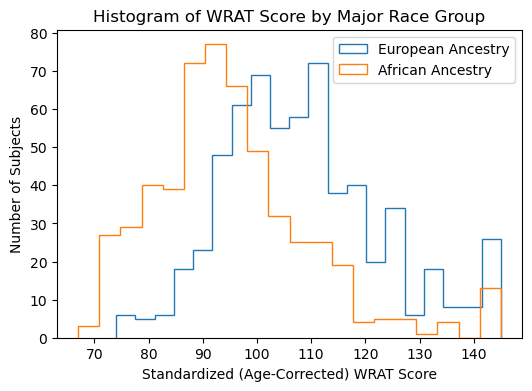

In [60]:
import matplotlib.pyplot as plt

rc0_wrat = wrat[race == 0]
rc1_wrat = wrat[race == 1]

fig, ax = plt.subplots(1,1,figsize=(6,4))

ax.hist(rc0_wrat, bins=20, histtype='step', label='European Ancestry')
ax.hist(rc1_wrat, bins=20, histtype='step', label='African Ancestry')
ax.set_xlabel('Standardized (Age-Corrected) WRAT Score')
ax.set_ylabel('Number of Subjects')
ax.legend()
ax.set_title('Histogram of WRAT Score by Major Race Group')

fig.savefig('/home/anton/Documents/Tulane/Research/Work/CL-VAE/wrat-hist.pdf')
fig.show()